## Business Context:

- The demand and usage of the internet is growing across the globe and public wifi is
becoming a new normal as we move forward. Wifi providers want to optimize the cost
while providing the free and paid wifi. Here, we have a use case of public WiFi hotspots
in New York City.
- The information comprises of records for every public WiFi hotspot (ones provided by or
in partnership with the city) in New York City.
- We would analyze the data and try to infer if the free public WiFi tends to cluster around
certain (more affluent) areas.

## Goal/Ask:

- Based on the business context, we will be using unsupervised learning techniques such
as clustering in order to identify clusters of wifi providers in the specific locations.
- However, prior to that, we need to answer few business questions by performing EDA
(Exploratory Data Analysis) to understand the data.
- In this assignment, focus is limited to EDA. Please refer to the dataset shared.

## Dataset Information

Dataset has 10 columns/features and 2500+ records
- OBJECTID – unique identifier
- BORO – Borough of New York City (BX-Bronx, QU-Queens, MN-Manhattan, BK-Brooklyn, SI-
Staten Island)
- TYPE – Type of wi-fi provided by the franchise
- PROVIDER – Franchise who is providing the wifi connection
- LAT – Latitude
- LON – Longitude
- LOCATION_T – Type of location that a wi-fi hotspot is present in
- CITY – The city in which the hotspot is located
- BoroCode – The NY City borough where the hotspots are located
- NTACode – Neighbourhood Tab Access by number

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
wifi_data = pd.read_excel("C://Users//Karthik.Iyer//Downloads//AccelerateAI//DV_EDA//DV_and_EDA-main//data//wifi_data.xlsx")
wifi_data.head()

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,998.0,MN,Free,LinkNYC - Citybridge,40.745968,-73.994039,Outdoor Kiosk,New York,1.0,MN17
1,999.0,MN,Free,LinkNYC - Citybridge,40.744614,-73.985069,Outdoor Kiosk,New York,1.0,MN17
2,1000.0,MN,Free,LinkNYC - Citybridge,40.757666,-73.985878,Outdoor Kiosk,New York,1.0,MN17
3,1001.0,MN,Free,LinkNYC - Citybridge,40.759971,-73.984342,Outdoor Kiosk,New York,1.0,MN17
4,1002.0,MN,Free,LinkNYC - Citybridge,40.760413,-73.984541,Outdoor Kiosk,New York,1.0,MN17


In [3]:
# Shape
wifi_data.shape

(2566, 10)

In the above dataset, there are 2566 observations with 10 features

In [4]:
# data types
wifi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    2566 non-null   float64
 1   Borough     2566 non-null   object 
 2   Type        2566 non-null   object 
 3   Provider    2566 non-null   object 
 4   Latitude    2566 non-null   float64
 5   Longitude   2566 non-null   float64
 6   Location_T  2566 non-null   object 
 7   City        2566 non-null   object 
 8   BoroCode    2566 non-null   float64
 9   NTACode     2566 non-null   object 
dtypes: float64(4), object(6)
memory usage: 200.6+ KB


Data types look appropriate and there are no missing values.

## Exploratory Data Analysis

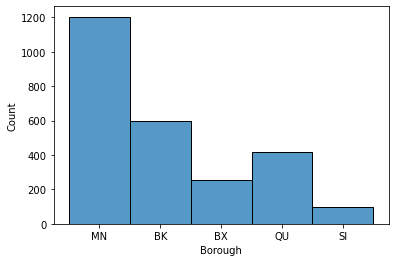

In [5]:
# Frequency distribution
sns.histplot(x='Borough', data=wifi_data)
plt.show()

Manhattan Borough has most number of public wifi hotspots in New York City

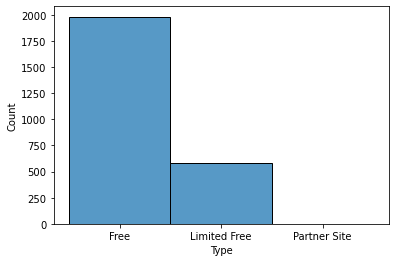

In [6]:
# Let's look at Type of wifi provided
sns.histplot(x='Type', data=wifi_data)
plt.show()

Most of the public wifi hotspots provided by Franchise in New York City is Free

In [7]:
# From the above it looks like there are no Partner Site, lets investigate the dataframe
wifi_data['Type'].value_counts()

Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64

Only 2 'Partner Site' Type of wifi connections in the whole New York City, indicating most of the connections are provided by the city itself without any partnership.

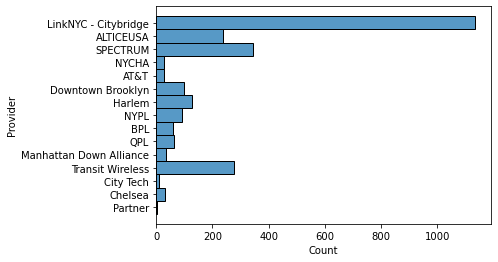

In [8]:
# Provider
sns.histplot(y='Provider', data=wifi_data)
plt.show()

Franchise providing highest number of wifi connections in New York is 'LinkNYC - Citybridge'

## Dropping irrelevant and redundant features

OBJECTID is only a unique identifier for the observations in the wifi dataset, and will not add any value. This can be removed from the dataset

In [9]:
wifi_data.drop(columns='OBJECTID', inplace=True)
wifi_data.columns

Index(['Borough', 'Type', 'Provider', 'Latitude', 'Longitude', 'Location_T',
       'City', 'BoroCode', 'NTACode'],
      dtype='object')

In [10]:
# Borough and NTACode
wifi_data[['Borough', 'NTACode']]

,Borough,NTACode
0,MN,MN17
1,MN,MN17
2,MN,MN17
3,MN,MN17
4,MN,MN17
...,...,...
2561,MN,MN17
2562,MN,MN17
2563,MN,MN17
2564,MN,MN17


Wanted to check if NTACode has any relevance here. Looks like there is some business relevance for this, as there are different values of NTACode for the same Borough (MN17, MN14 etc. for MN). So let's not drop the feature NTACode without understanding the full business significance.

## Univariate and Bivariate Analysis

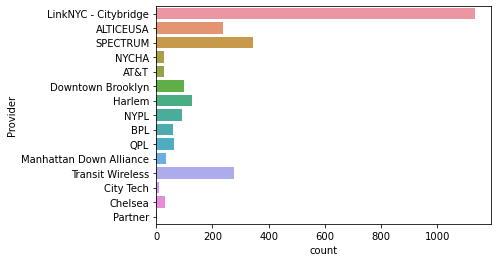

In [11]:
# Which provider has the highest number of wifi hotspots
sns.countplot(y='Provider', data=wifi_data)
plt.show()

LinkNYC - Citybridge has the highest number of wifi hotspots with connections over 1000

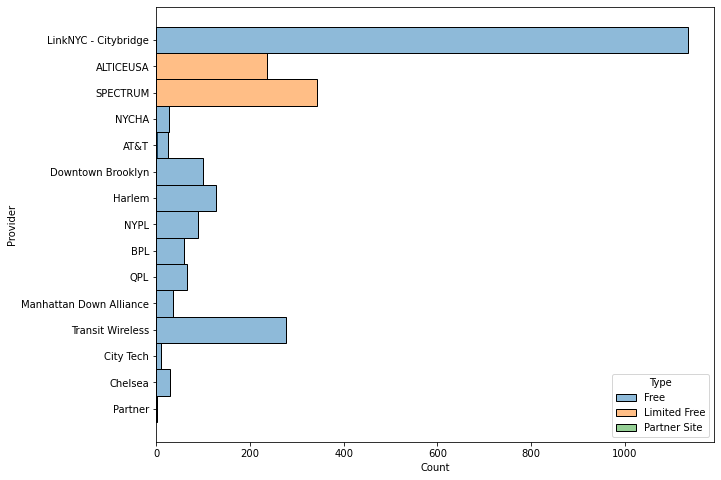

In [12]:
# Which Provider provides highest number of Free wifi hotspots.
# Is the second highest provider same for "free wifi hotspots" compared to "all wifi hotspots"

plt.figure(figsize=(10,8))
sns.histplot(y='Provider', hue='Type', data=wifi_data)
plt.show()

1. Highest number of free wifi hotspots is provided by 'LinkNYC - Citybridge' with over 1000 connections. 
2. The second highest provider which is 'SPECTRUM' with connections less than 400 provides only Limited Free wifi hotspot. So the answer to the second question is No.

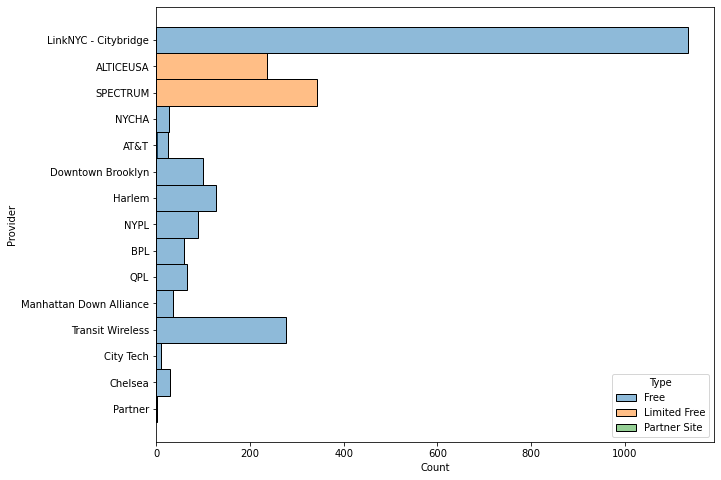

In [13]:
# List down the name of providers that provide "Limited Free" type of wifi

plt.figure(figsize=(10,8))
sns.histplot(y='Provider', hue='Type', data=wifi_data)
plt.show()

ALTICEUSA and SPECTRUM are the providers who provide 'Limited Free' wifi hotspots.

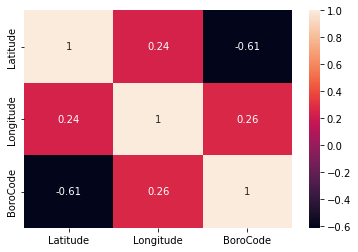

In [14]:
# What is the correlation coefficient between Borough and BoroCode

sns.heatmap(wifi_data.corr(), annot=True)
plt.show()

Can we calculate the correlation coefficient between Categorical (Borough) and Numeric (BoroCode) variables. Does it make sense. The above heatmap will only consider for numeric variables.

In [15]:
# Are there any Indoor Free wifi hotspots
wifi_data['Location_T'].value_counts()

Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: Location_T, dtype: int64

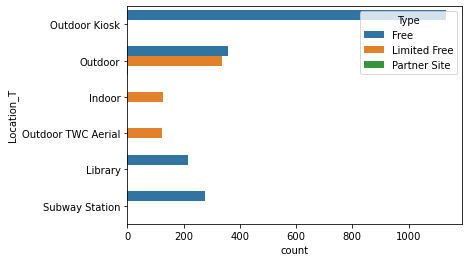

In [16]:
# Look at the feature Location_T by Type of wifi hotspot
sns.countplot(y='Location_T', hue='Type', data=wifi_data)
plt.show()

From the above plot, it is clear that there are no indoor free wifi hotspots.

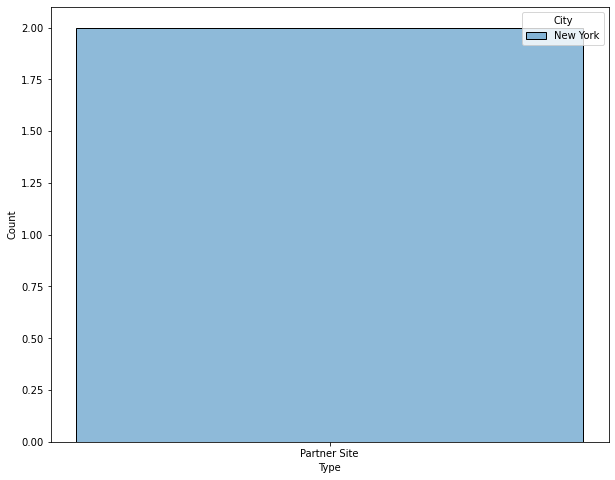

In [17]:
# Which City has 'partner_site' type of wifi hotspot

plt.figure(figsize=(10,8))
sns.histplot(x='Type', hue='City', data=wifi_data[wifi_data['Type']=='Partner Site'])
plt.show()

'Partner Site' type of wifi hotspot is in New York City

In [18]:
wifi_data[wifi_data['Type']=='Partner Site']

,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
1332,MN,Partner Site,Partner,40.7538,-73.9833,Outdoor,New York,1.0,MN17
2530,MN,Partner Site,Partner,40.7360,-73.9904,Outdoor,New York,1.0,MN13


This is also evident from checking the dataframe as above